<a href="https://colab.research.google.com/github/aryanfaghihi/ai-course/blob/master/Tabular%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


## Make a copy

**Follow the following steps to make your own copy. You will lose your changes if you don't make your own copy!**

From the tooltip above, you should see 

File | Edit | View | Insert | Runtime | Tools | Help

1. Click on **File**
2. Click on **Save a copy in Drive**

## Import

Let's import the packages we need for today. We will be using [`fastai`](https://www.fast.ai/) to create our AI model. This library makes it easy to get started. As the creators of `fastai` have put it:

> `fastai` - Making neural nets uncool again!



In [6]:
from fastai.tabular import *
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data

As always, the first we will do is to explore the dataset. We will be using the same dataset as before [(`The Adult Dataset`)](https://archive.ics.uci.edu/ml/datasets/adult). Since you are already familiar with the dataset, we will be focusing on more advanced topics today. 

In [2]:
# Downloading and unzipping the dataset
path = untar_data(URLs.ADULT_SAMPLE)

# Reading the csv dataset
data = pd.read_csv(path/'adult.csv')

Let's remind ourselves of our dataset columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32074 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32049 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


> Side note on `Non-Null Count`
* Notice that most columns do not have any missing values. However some columns such as `occupation` have some missing (null) values
* We will cover how to deal with missing values today

> Side note on `Dtype`
* int64: integer (numerical/continuous)
* float64: decimal (numerical/continuous)
* object: text/string (categorical)

## Plotting

Plotting helps us visualise the datasets much more quickly and make adjustments to our analysis. This is sometimes referred to as **Feature engineering** since we already have some understanding of the dataset and what each number means. 

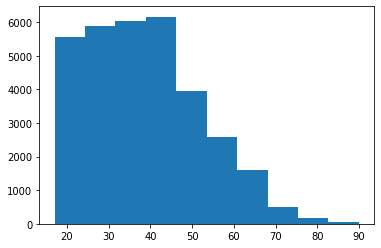

In [9]:
plt.hist(data['age']);

---

⭐  Do you see any issues here?

---